In [1]:
from analysis.simulation_results.MB_behaviour import extract_data_MB_glmfit
import matplotlib.pyplot as plt
import pandas as pd
import pickle

In [2]:
all_coefs = []
alpha = 0.3

In [3]:
for beta in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]:
    data_path = 'analysis/simulation_results/data/MB/alpha{}beta{}/'.format(alpha, beta)
    _, __, ___, glm_result = extract_data_MB_glmfit(data_path)
    all_coefs.append(glm_result)

/home/sahar/Documents/Theory of Mind/Codes/env/lib/python3.8/site-packages/statsmodels/genmod/bayes_mixed_glm.py:792: UserWarning: VB fitting did not converge
  warnings.warn("VB fitting did not converge")


In [4]:
with open('sahar-mixedlm-params-mb.pkl', 'wb') as file:
    pickle.dump(all_coefs, file)

In [5]:
rani_mb = pd.DataFrame({
    'common_reward': [0.0413, 0.3765, 0.3881, 1.2618, 1.0743, 0.7288, 0.5824, 1.2574, 1.7543, 1.0229],
    'reward_prob': [0.7239, 1.5666, 2.3548, 2.2140, 2.4867, 3.2874, 2.9773, 4.1750, 4.0687, 4.4641],
    'interaction': [0.2730, 0.2429, 0.7934, -0.4423, 0.0493, 0.8797, 1.4312, 0.3404, -0.5868, 1.4827]
})

In [6]:
sahar_mb = pd.DataFrame({
    'common_reward': [result.fe_mean[1] for result in all_coefs],
    'reward_prob': [result.fe_mean[2] for result in all_coefs],
    'interaction': [result.fe_mean[3] for result in all_coefs]
})

Text(0, 0.5, 'MB coefficients - Rani')

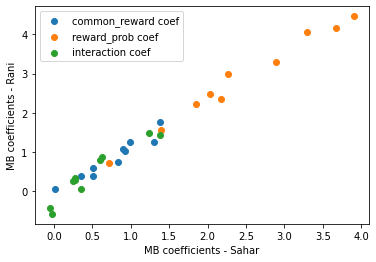

In [7]:
plt.scatter(sahar_mb['common_reward'], rani_mb['common_reward'], label='common_reward coef')
plt.scatter(sahar_mb['reward_prob'], rani_mb['reward_prob'], label='reward_prob coef')
plt.scatter(sahar_mb['interaction'], rani_mb['interaction'], label='interaction coef')
plt.legend()
plt.xlabel('MB coefficients - Sahar')
plt.ylabel('MB coefficients - Rani')

In [16]:
from analysis.simulation_results.MF_behaviour import extract_data_MF_glmfit

In [17]:
all_coefs = []
for beta in [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]:
    data_path = 'analysis/simulation_results/data/MB/alpha{}beta{}/'.format(alpha, beta)
    _, __, ___, glm_result = extract_data_MF_glmfit(data_path)
    all_coefs.append(glm_result)

In [22]:
rani_mf = pd.DataFrame({
    'common_reward': [-0.0820, -0.0043, -0.0197, -0.0076, -0.0411, -0.0216, -0.0675, -0.0629, -0.0016, -0.0528],
    'unique_reward': [0.3991, 0.6821, 1.0185, 1.2203, 1.4280, 1.4654, 1.7087, 1.6897, 1.8533, 1.9648],
    'interaction': [-0.0200, 0.0146, -0.2799, 0.1675, -0.0121, -0.0020, -0.3320, 0.2351, -0.0581, 0.0051]
})

In [23]:
sahar_mf = pd.DataFrame({
    'common_reward': [result.fe_mean[1] for result in all_coefs],
    'unique_reward': [result.fe_mean[2] for result in all_coefs],
    'interaction': [result.fe_mean[3] for result in all_coefs]
})

Text(0, 0.5, 'MF coefficients - Rani')

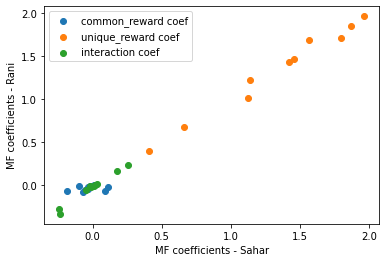

In [25]:
plt.scatter(sahar_mf['common_reward'], rani_mf['common_reward'], label='common_reward coef')
plt.scatter(sahar_mf['unique_reward'], rani_mf['unique_reward'], label='unique_reward coef')
plt.scatter(sahar_mf['interaction'], rani_mf['interaction'], label='interaction coef')
plt.legend()
plt.xlabel('MF coefficients - Sahar')
plt.ylabel('MF coefficients - Rani')